## importing libraries

In [76]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Loading data

In [82]:
df = pd.read_csv("Iris.csv")

In [83]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

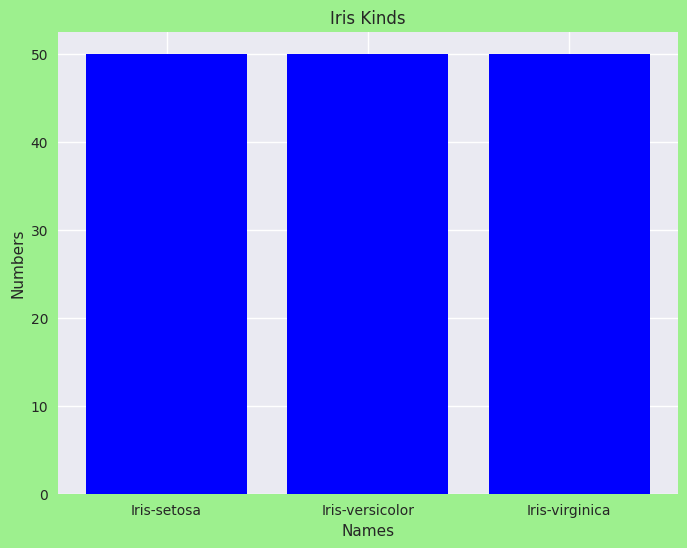

In [88]:
plt.figure(figsize = (8,6),facecolor='#9DF08E')
plt.bar(df['Species'].unique(), df['Species'].value_counts(), color ='b')
plt.title('Iris Kinds')
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.show()

In [89]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


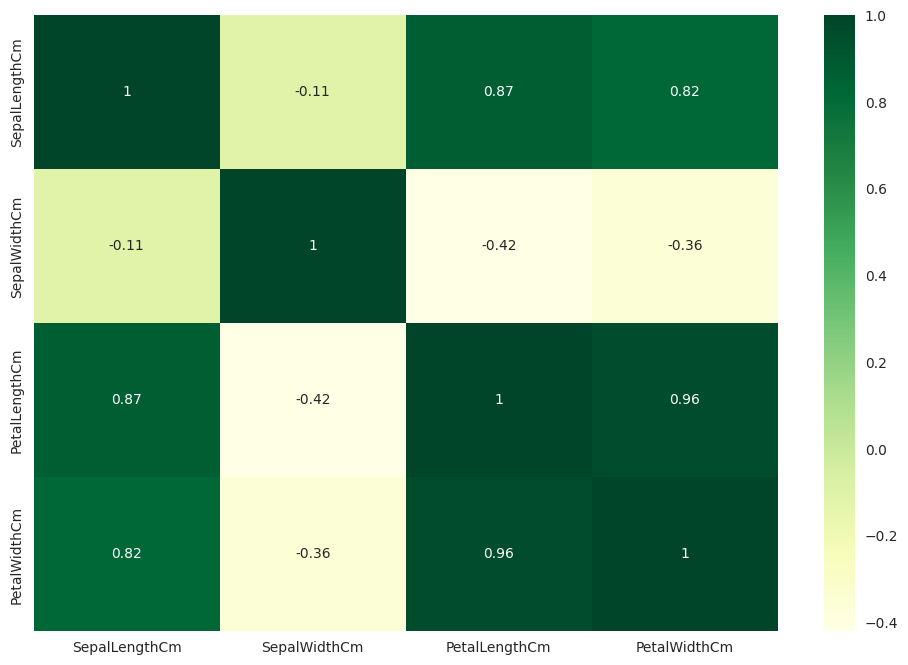

In [91]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data = cor, annot = True, cmap = plt.cm.YlGn)
plt.show()

In [92]:
x = df.iloc[:,0:4]
y = df.iloc[:,4:]

In [93]:
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [94]:
y.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=8)


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=8)
logr.fit(x_train,y_train)

y_pred = logr.predict(x_test)

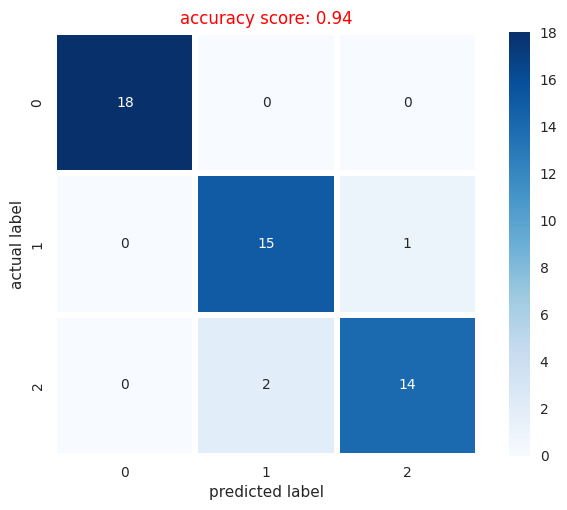

In [97]:
accuracy_score_logr = accuracy_score(y_test,y_pred)
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_logr}',size=12,color='red')
plt.show()

## KNN Regression

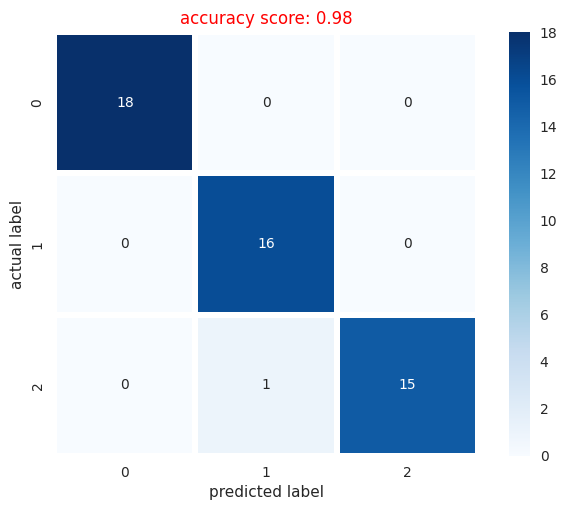

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_knn = accuracy_score(y_test,y_pred)
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_knn}',size=12,color='red')
plt.show()

## confusion matrix of Logistic Regression and KNN Regression

In [99]:
print('\033[93m' + '--CONFUSİON MATRİCES --\n' + '\033[0m')

print(f'Logistic Regression          \n{cm_logr}\n')
print(f'KNN-K Nearest Neighbors      \n{cm_knn}\n')

--CONFUSİON MATRİCES --

Logistic Regression          
[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]

KNN-K Nearest Neighbors      
[[18  0  0]
 [ 0 16  0]
 [ 0  1 15]]



## ANN model

In [100]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [101]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


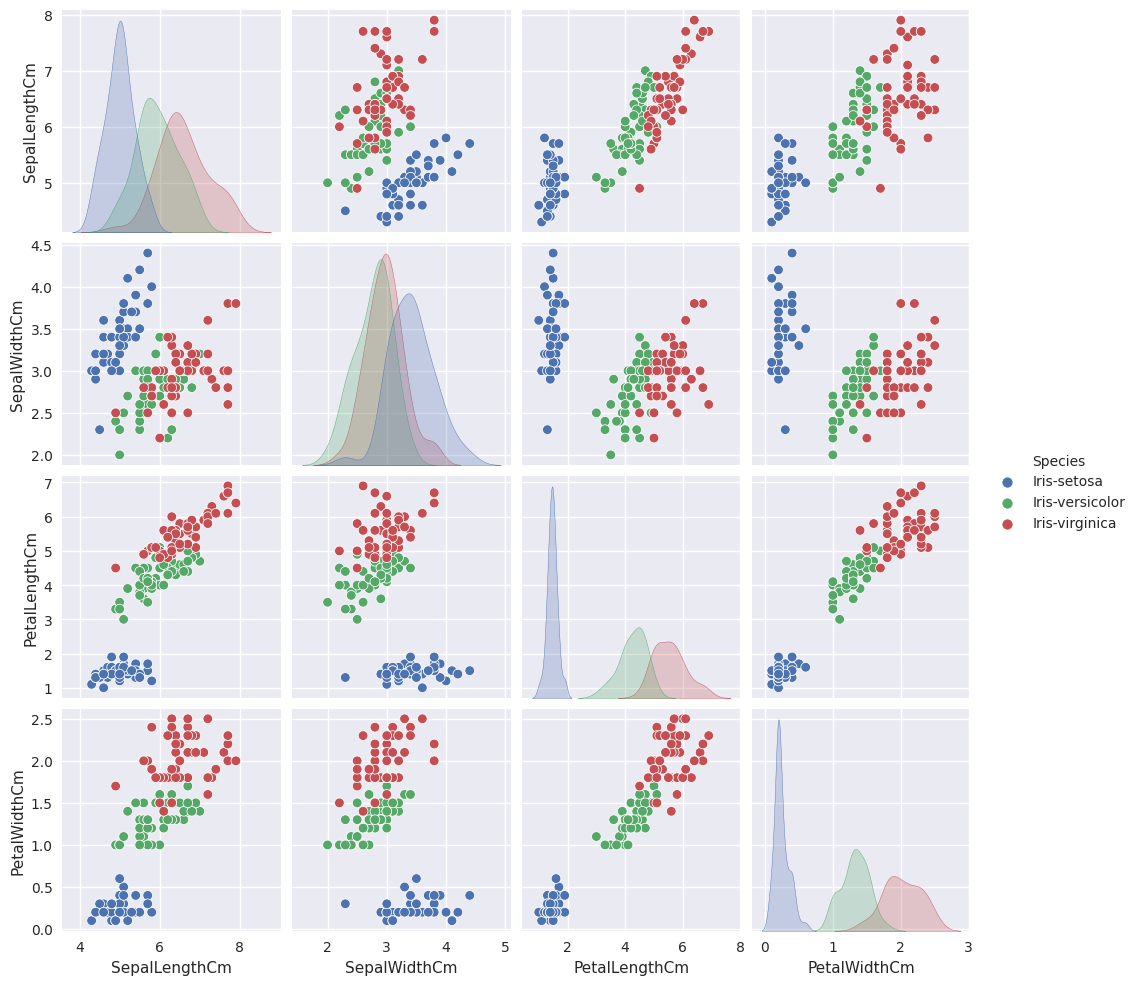

In [104]:
sns.pairplot(df,hue='Species')

In [105]:
X = df.drop('Species',axis=1).values
y = pd.get_dummies(df['Species']).values

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state=101)

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [109]:
X_train_scaled.shape[1:]

(4,)

In [110]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  ''' 
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model

In [111]:
keras_cls = KerasClassifier(build_model)

In [112]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

In [113]:
param_dict = {
    "n_hidden" : (2,3),
    "n_neurons" : tuple(range(2,7)),
    "learning_rate" : (3e-2,3e-3,3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

In [114]:
%%time
model_cv.fit(
    X_train_scaled, y_train, epochs=150,
    validation_data = (X_test_scaled,y_test),
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)],
    verbose=0
)

2/2 [==============================] - 0s 3ms/step - loss: 1.0517 - accuracy: 0.2703
CPU times: user 2min 43s, sys: 12 s, total: 2min 56s
Wall time: 2min 59s


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc3347a82d0>,
                   param_distributions={'learning_rate': (0.03, 0.003, 0.0003),
                                        'n_hidden': (2, 3),
                                        'n_neurons': (2, 3, 4, 5, 6)})

In [118]:
model_cv.best_params_

{'n_neurons': 4, 'n_hidden': 2, 'learning_rate': 0.03}

In [119]:
model_cv.best_score_

0.9549549619356791

## Linear Regression

In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings

In [140]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8.7,6.27)})
warnings.filterwarnings('ignore') 
pd.options.display.max_columns=999 
import os

In [141]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [163]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [164]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [165]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


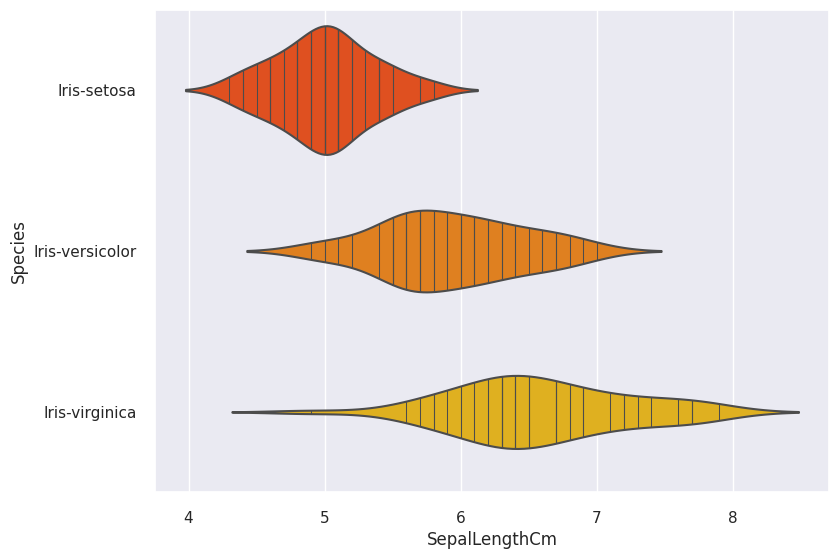

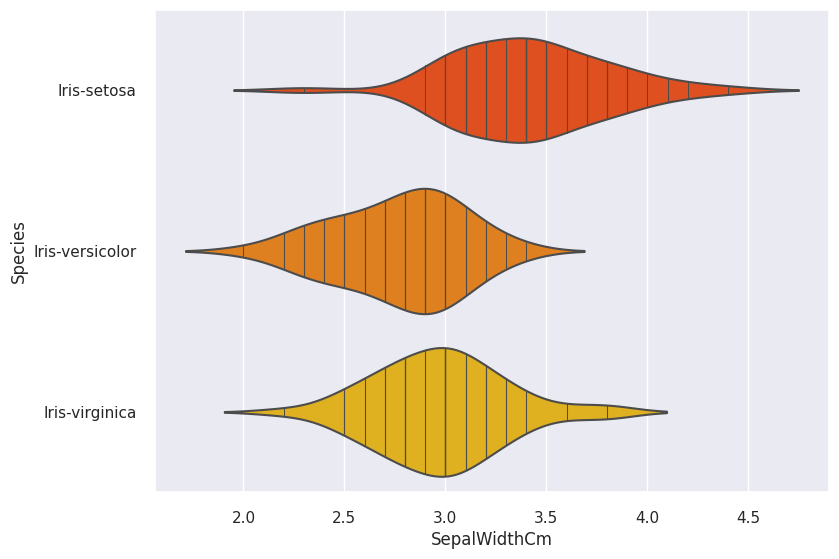

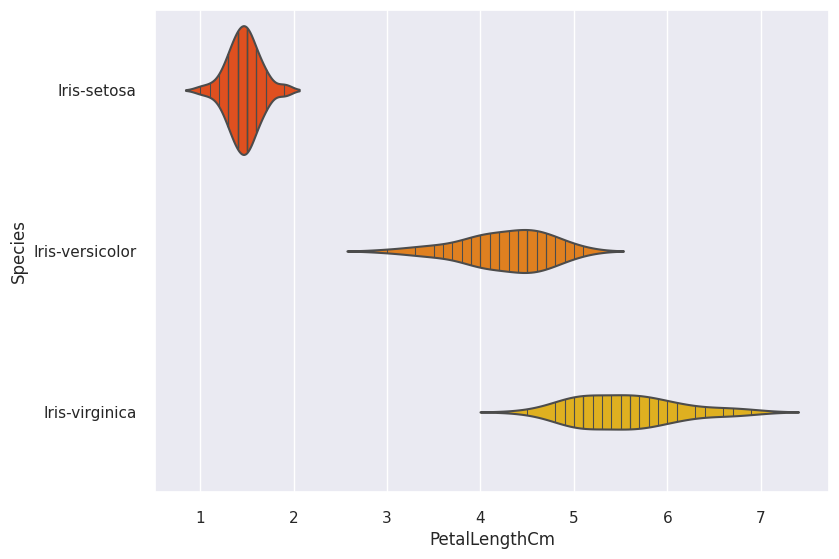

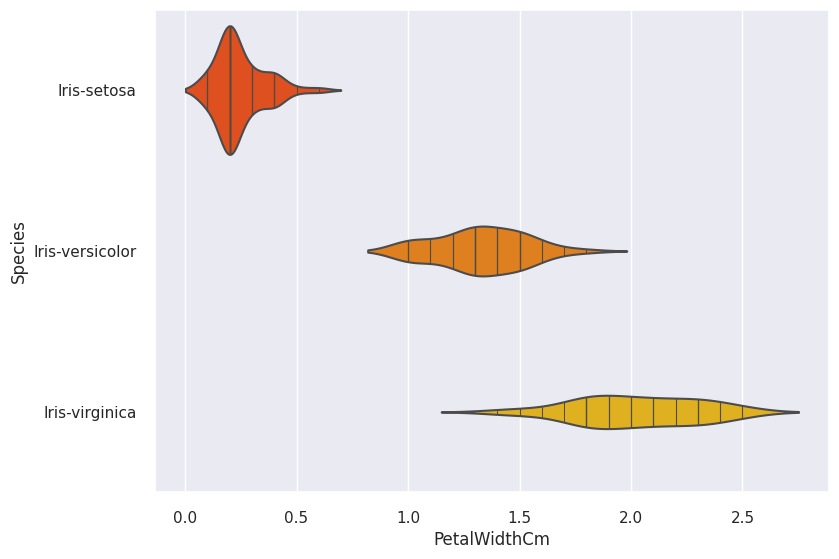

In [166]:
sns.violinplot(x='SepalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()

In [169]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = df.drop(['SepalLengthCm', 'PetalLengthCm'], axis=1).values # Input Feature Values
y = df.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [170]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [179]:
iteration = 10000
learning_rate = 0.003 # If you are going by formula, this is actually alpha.
J = np.zeros(iteration) # 1 x 10000 maxtix